# <div class="alert alert-info" style="text-align: center;" markdown="1">Exploratory Data Analysis</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## `Elements of Structured Data`

### Data Types

- **Numeric**:
    - **Continuous**: Real numbers.
    - **Discrete**: Integers.

- **Categorical**:
    - **Binary**: Two categories (true/false).
    - **Ordinal**: Categories with an order.

### Rectangular Data

- **Data Frame**:
    - Rows: Observations.
    - Columns: Variables.


In [3]:
# Example dataframe in pandas
df = pd.read_csv('data/state.csv')
df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


### Non Rectangular Data    

- **Time Series**:
    - Data indexed by time.
- **Spatial Data**:
    - Data indexed by spatial location.
- **Graph Data**:
    - Data indexed by relationships.

## `Estimates of Location`

### Mean

$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$

In [6]:
df.Population.mean()

6162876.3

### Trimmed Mean

$\bar{x}_{\text{trimmed}} = \frac{1}{n - 2k} \sum_{i=k+1}^{n-k} x_{(i)}$

> 📌 Handle outliers.

In [13]:
k = 10
n = df.shape[0]

trim_mean_1 = sum(np.sort(df.Population)[k:-k])/(n-2*k)

# or using scipy.stats
from scipy.stats import trim_mean
trim_mean_2 = trim_mean(df.Population, 0.1)

trim_mean_1, trim_mean_2

(4413915.966666667, 4783697.125)

### Weighted Mean

$\bar{x}_{\text{weighted}} = \frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} w_i}$

> 📌 Handle less accurate measurements byt weighting them less.

In [14]:
weights = np.random.rand(n)

weighted_mean_1 = sum(df.Population*weights)/sum(weights)

# or using numpy
weighted_mean_2 = np.average(df.Population, weights=weights)

weighted_mean_1, weighted_mean_2

(6532600.905524014, 6532600.905524014)

### Median

- 📌 The value that separates the higher half from the lower half of the data.
- 📌 Robust to outliers.


In [16]:
meadian_1 = np.median(df.Population)

# or using pandas
meadian_2 = df.Population.median()

meadian_1, meadian_2

(4436369.5, 4436369.5)

### Weighted Median

In [18]:
# !pip install wquantiles

In [19]:
# We can use wquantiles package to calculate weighted quantiles
from wquantiles import median

weighted_median = median(df.Population, weights=weights)
weighted_median

4555214.727606662

### Outliers

- 📌 **Outliers**: Data points that are far from the other data points.

## `Estimates of Variability`

### Standard Deviation and Related Estimates

* Mean abosoilute deviation (MAD)

$\text{MAD} = \frac{1}{n} \sum_{i=1}^{n} |x_i - \bar{x}|$

In [24]:
# find mean absolute deviation
mean_absolute_deviation = sum(abs(df.Population - df.Population.mean()))/n
print(mean_absolute_deviation)

4450933.356000001


* Variance

$\sigma^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2$

> 📌 Why n-1: there are n-1 degrees of freedom  since there is one constraint: the standard deviation depends on calculating the sample mean.

* Standard Deviation

$\sigma = \sqrt{\sigma^2} or \sqrt{variance}$

> 📌 Standard deviation is esier to interpret than variance because it is in the same units as the data because variance is squared.

> 📌 Standard deviation and variance both are sensitive to **outliers** since they are based on squared deviations.

In [23]:
df.Population.std()

6848235.347401142

#### Median Absolute Deviation from the Median (MAD)

$\text{MAD} = \text{median}(|x_1 - \text{median}(x), |x_2 - \text{median}(x), \ldots, |x_n - \text{median}(x)|)$

> 📌 Robust to outliers.

In [22]:
# MAD using robust package
from statsmodels.robust.scale import mad

mad_1 = mad(df.Population)
print(mad_1)

3849876.1459979336


### Estimates Based on Percentiles

> 📌 Estimates based on sorted data (ordered statstics).

#### Range

- Difference between the largest and smallest value.

In [68]:
_range = df.Population.max() - df.Population.min()
print(_range)

36690330


#### Percentiles

- The value below which a certain percentage of the data falls.

In [31]:
# Percentiles of murder rate
df["Murder.Rate"].quantile([0.05, 0.25, 0.50, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

#### Interquartile Range (IQR)

- Difference between the 75th percentile and the 25th percentile.

In [28]:
IQR = df.Population.quantile(0.75) - df.Population.quantile(0.25)
print(IQR)

4847308.0


## `Exploring the Data Distribution`

> How the data is distributed overall.

### Percentiles and Boxplots

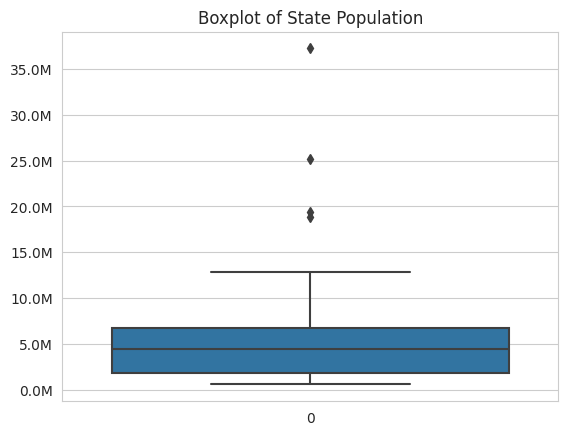

In [45]:
import matplotlib.ticker as ticker

# Custom formatter function
def millions_formatter(x, pos):
    return f'{x*1e-6:.1f}M'

fig, ax = plt.subplots()
sns.set_style('whitegrid')

sns.boxplot(df.Population)

plt.title("Boxplot of State Population")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
plt.show()

- From boxplot we can immediately see the median is around 5 million.
- Half the states fall between ~2 and ~7 million.
- There are some high population outliers above ~15 million.

---

- Top and bottom of the box are the 75th and 25th percentiles.
- Median is the line in the middle of the box.
- The "whiskers" extend to the smallest and largest values that are not outliers.
- Outliers are beyond the whiskers.

### Frequency Tables and Histograms

In [63]:
binned_population = pd.cut(df.Population, bins=10)
binned_population.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

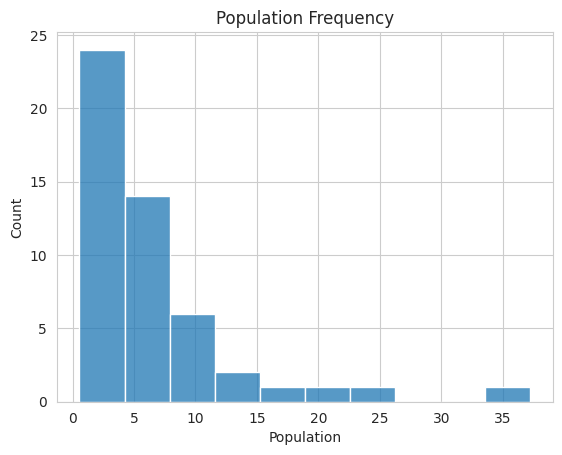

In [64]:
fig, ax = plt.subplots()

sns.histplot(df.Population/1000000, bins=10)
plt.title("Population Frequency")
plt.show()

### Density Plots and Estimates

- Related to histograms.
- Smoothed version of the histogram, shows the distribution of the data as a continuous line.

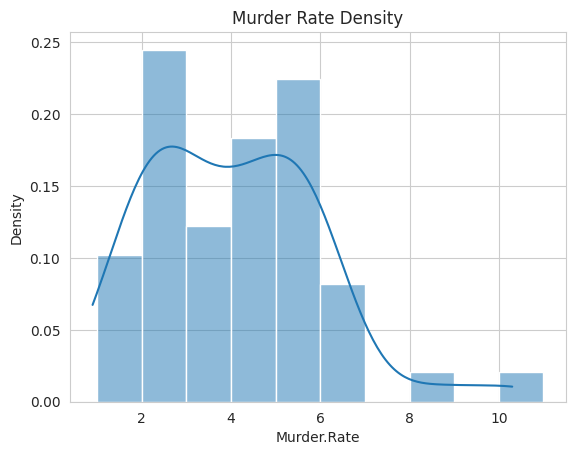

In [73]:
bins_range = range(1,12)
sns.histplot(df["Murder.Rate"], bins=bins_range, kde=True, stat='density')
plt.title("Murder Rate Density")
plt.show()

- Density plot gives proportion of data that falls within a particular range of values.
- Area under the curve is 1.
- In bins we calculated area under the curve between two points.

## `Exploring Binary and Categorical Data`

> Proportions and percentages tell the story for categorical data.

In [117]:
df_dfw = pd.read_csv("data/dfw_airline.csv")
df_dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


In [118]:
df_dfw = df_dfw.T.rename(columns={0:"count"})
df_dfw

,count
Carrier,64263.16
ATC,84856.50
Weather,11235.42
Security,343.15
Inbound,118427.82


### Percentage of Delays

#### Bar Charts

In [119]:
(df_dfw["count"]/sum(df_dfw["count"])).round(4)*100

Carrier     23.02
ATC         30.40
Weather      4.03
Security     0.12
Inbound     42.43
Name: count, dtype: float64

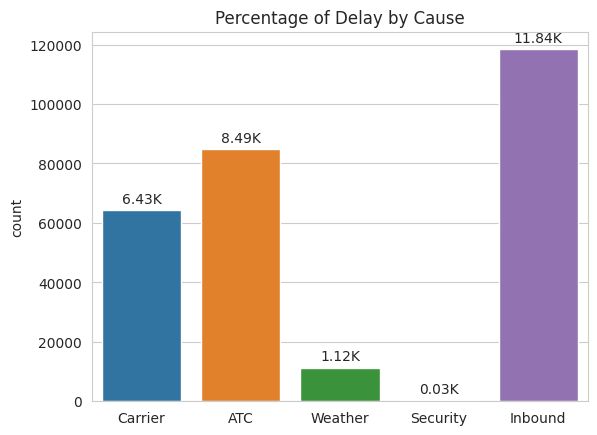

In [120]:
fig, ax = plt.subplots()
sns.barplot(x=df_dfw.index,y=df_dfw["count"])
# Annotate bars with values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/10000:.2f}K',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points')
plt.title("Percentage of Delay by Cause")
plt.show()

#### Pie Charts

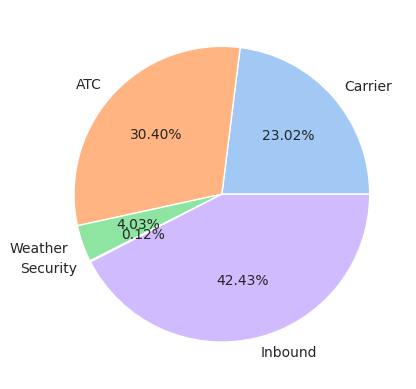

In [121]:
fig, ax = plt.subplots()

plt.pie(df_dfw["count"], labels=df_dfw.index, autopct='%1.2f%%', colors=sns.color_palette('pastel'))
plt.show()

### Mode

📌 Mode is the value that appears most often in the dataset. 

In [116]:
df_airline = pd.read_csv("data/airline_stats.csv")
df_airline.head(2)

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American


In [122]:
df_airline.airline.mode()

0    Delta
Name: airline, dtype: object

### Expected Value

📌 Expected value is the form  of weighted mean.

If 15% will be delayed by 30 minutes and 85% will be on time, the expected value is:

$0.15 \times 30 + 0.85 \times 0 = 4.5$

### Probability

📌 Probability that an event will happen is the proportion of times it will occur if the situation is repeated coutless times.

## `Correlation`

> How two variables are related.

### Correlation Coefficient

- Measures the strength of the relationship between two variables.

$r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{(n-1) std_x * std_y}$


- Ranges from -1 to 1.
- 1: Perfect positive correlation.
- -1: Perfect negative correlation.
- 0: No correlation.

In [132]:
sp500_px = pd.read_csv("data/sp500_data.csv.gz", index_col=0)
sp500_sym = pd.read_csv("data/sp500_sectors.csv")
sp500_sym.head(2)

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA


In [133]:
sp500_px.head(2)

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.125,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.125,0.0


In [135]:
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
df_telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
df_telecom.head()

,T,CTL,FTR,VZ,LVLT
2012-07-02,0.422496,0.140847,0.070879,0.554180,-0.519998
2012-07-03,-0.177448,0.066280,0.070879,-0.025976,-0.049999
2012-07-05,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
2012-07-06,0.342205,0.132563,0.007875,0.140106,-0.359999
2012-07-09,0.136883,0.124279,-0.023626,0.253943,0.180000


### Correlation Matrix

In [136]:
df_telecom.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


### Correlation with Heat Maps

In [140]:
etfSymbols = sp500_sym[sp500_sym['sector'] == 'etf']['symbol']

# Filter data for dates July 2012 through June 2015
df_etfs = sp500_px.loc[sp500_px.index >= '2012-07-01', etfSymbols]
df_etfs.head()

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.40,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.52,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.56,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
2012-07-06,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.80,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
2012-07-09,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.48,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457


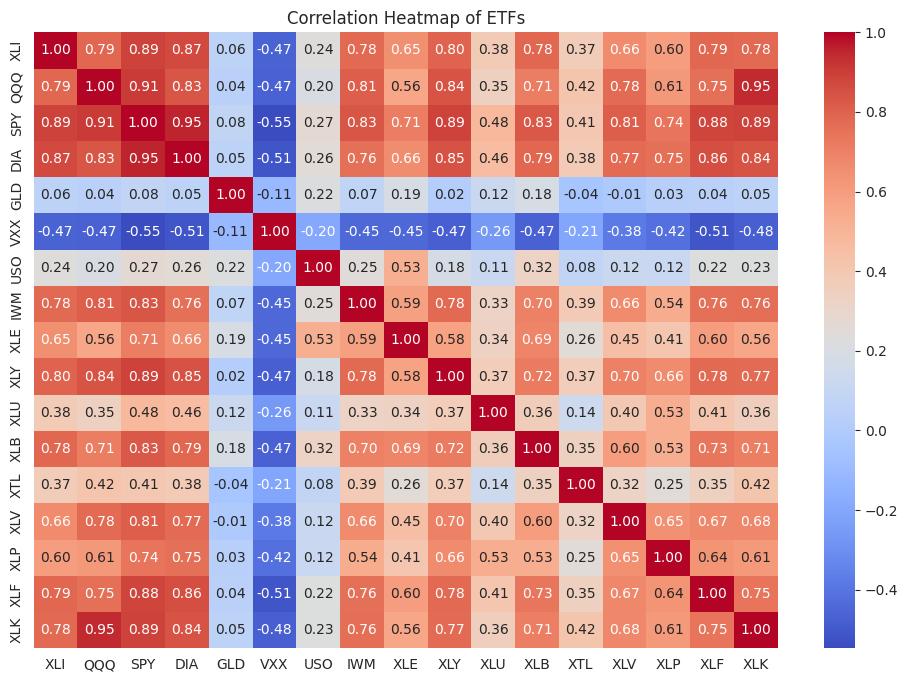

In [150]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(df_etfs.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of ETFs")
plt.show()

### Correlation with Scatter Plots

> Relationship between two variables.

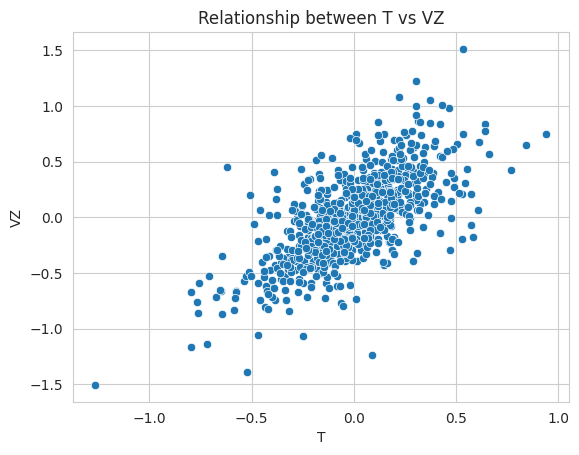

In [156]:
fig, ax = plt.subplots()

sns.scatterplot(x=df_telecom['T'], y=df_telecom['VZ'], markers='o')
plt.title("Relationship between T vs VZ")
plt.show()

## `Exploring Two or More Variables`

### Hexagonal Binning

- Plotting numeric vs numeric data.
- Large number of records.

In [157]:
df_kc_tax = pd.read_csv("data/kc_tax.csv.gz")
df_kc_tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [158]:
df_kc_tax.shape

(498249, 3)

In [159]:
df_kc_tax_2 = df_kc_tax.loc[(df_kc_tax.TaxAssessedValue < 750000) & (df_kc_tax.SqFtTotLiving > 100) & (df_kc_tax.SqFtTotLiving < 3500), :]
df_kc_tax_2.shape

(432693, 3)

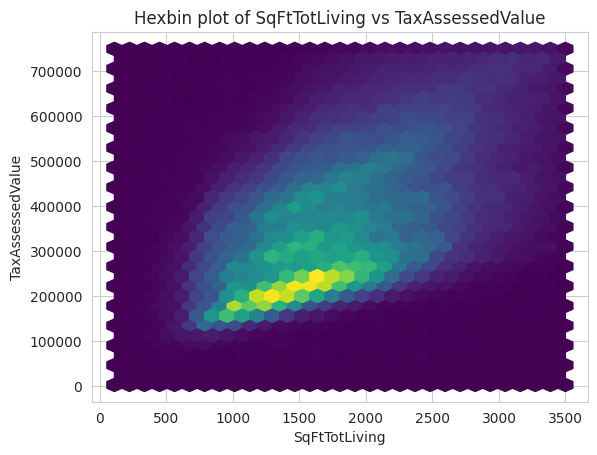

In [169]:
fig, ax = plt.subplots()

plt.hexbin(df_kc_tax_2.SqFtTotLiving, df_kc_tax_2.TaxAssessedValue, gridsize=30, cmap='viridis')
plt.xlabel("SqFtTotLiving")
plt.ylabel("TaxAssessedValue")
plt.title("Hexbin plot of SqFtTotLiving vs TaxAssessedValue")
plt.show()

### Contours

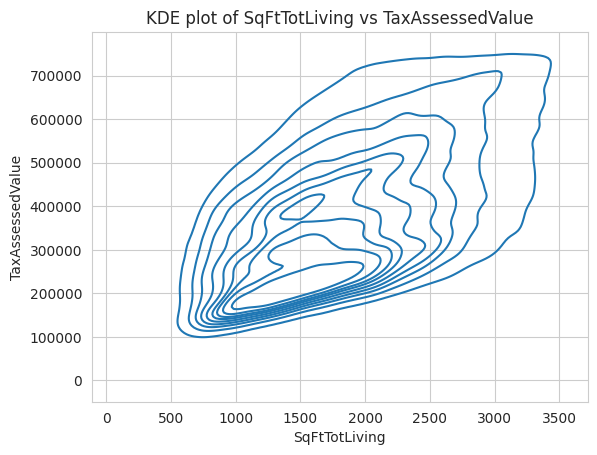

In [175]:
fig, ax = plt.subplots()

sns.kdeplot(x=df_kc_tax_2.SqFtTotLiving, y=df_kc_tax_2.TaxAssessedValue)
plt.xlabel("SqFtTotLiving")
plt.ylabel("TaxAssessedValue")
plt.title("KDE plot of SqFtTotLiving vs TaxAssessedValue")
plt.show()

### Two Categorical Variables

> Contingency tables.

In [176]:
df_loan = pd.read_csv("data/loan_data.csv.gz")
df_loan.head()

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


In [178]:
df_loan.columns

Index(['Unnamed: 0', 'status', 'loan_amnt', 'term', 'annual_inc', 'dti',
       'payment_inc_ratio', 'revol_bal', 'revol_util', 'purpose',
       'home_ownership', 'delinq_2yrs_zero', 'pub_rec_zero', 'open_acc',
       'grade', 'outcome', 'emp_length', 'purpose_', 'home_', 'emp_len_',
       'borrower_score'],
      dtype='object')

In [188]:
cross_tab = pd.crosstab(df_loan.grade, df_loan.status, margins=True, margins_name="Total")
cross_tab

status,Charged Off,Default,Fully Paid,Total
grade,,,,
0.2,146,0,38,184
0.4,95,1,34,130
0.6,61,2,23,86
0.8,51,0,36,87
1.0,53,0,22,75
1.2,396,4,171,571
1.4,330,3,137,470
1.6,299,3,98,400
1.8,262,5,86,353


### Catergorical and Numeric Data

#### Box Plots

In [189]:
df_airline.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


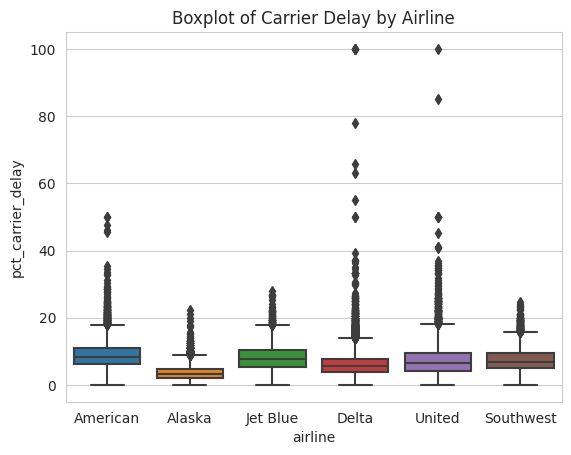

In [190]:
fig, ax = plt.subplots()

sns.boxplot(x=df_airline['airline'], y=df_airline['pct_carrier_delay'])
plt.title("Boxplot of Carrier Delay by Airline")
plt.show()

- 📌 Alaska has fewest delayes while American has most delayes.

#### Violin Plots

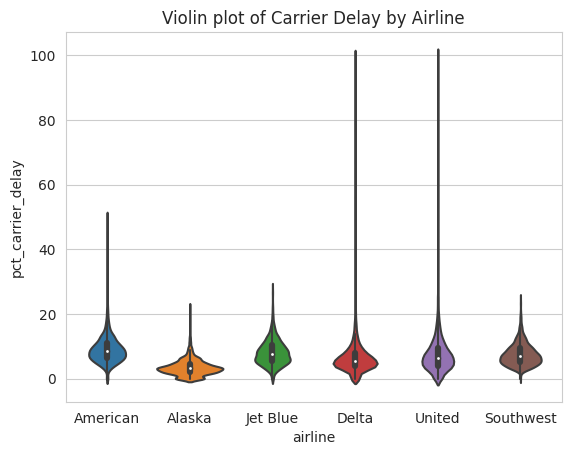

In [191]:
fig, ax = plt.subplots()

sns.violinplot(x=df_airline['airline'], y=df_airline['pct_carrier_delay'])
plt.title("Violin plot of Carrier Delay by Airline")
plt.show()

### Visualizing Multiple Variables

In [193]:
df_kc_tax_2.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0


In [198]:
zip_codes = [98188, 98105, 98108, 98126]
df_kc_tax_zip = df_kc_tax_2.loc[df_kc_tax_2.ZipCode.isin(zip_codes), :]
df_kc_tax_zip.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0


In [199]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=30, cmap=cmap, **kwargs)

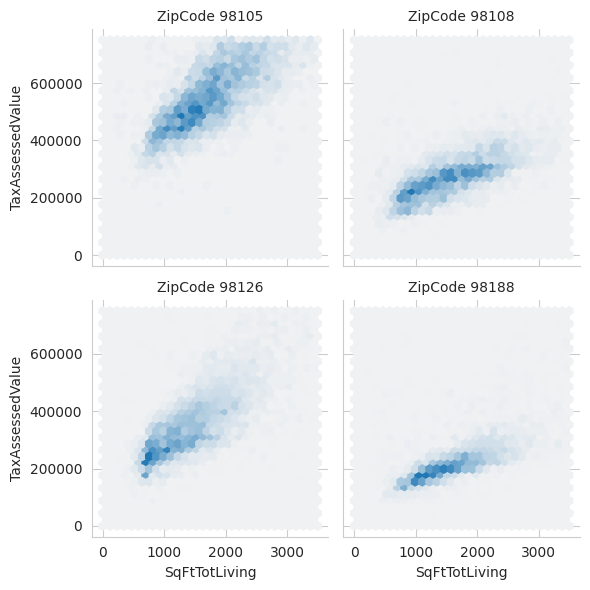

In [200]:
g = sns.FacetGrid(df_kc_tax_zip, col="ZipCode", col_wrap=2)
g.map(hexbin, "SqFtTotLiving", "TaxAssessedValue", extent=[0, 3500, 0, 750000])
g.set_axis_labels("SqFtTotLiving", "TaxAssessedValue")
g.set_titles("ZipCode {col_name:.0f}")
plt.show()